## Load packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# load visualization packages
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

import scipy.stats as stats
from sklearn.linear_model import LinearRegression as ols
from sklearn.linear_model import Ridge as ridge
from sklearn.linear_model import Lasso as lasso

## Load data from qualtrics

In [2]:
df = pd.read_csv('qualtrics.csv')
df = df.rename(columns={'Q1 [0]': 'Control',
                       'Q1[1]': 'Treatment'})
df = df[(~df['Control'].isnull()) | (~df['Treatment'].isnull())]
df['Group'] = 'Control'
df.loc[df['Control'].isnull(), 'Group'] = 'Treatment'
df.columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Time', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Education', 'StudyArea',
       'Professional', 'Investment', 'In401k', 'DataScience', 'Control',
       'Treatment', 'CheckReference', 'Group']
df = df[['Time', 'Education', 'StudyArea','Professional', 'Investment', 'In401k', 'DataScience', 
         'Control','Treatment', 'CheckReference', 'Group']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 151
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            147 non-null    int64 
 1   Education       146 non-null    object
 2   StudyArea       146 non-null    object
 3   Professional    147 non-null    object
 4   Investment      147 non-null    object
 5   In401k          147 non-null    object
 6   DataScience     147 non-null    object
 7   Control         75 non-null     object
 8   Treatment       72 non-null     object
 9   CheckReference  147 non-null    object
 10  Group           147 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.8+ KB


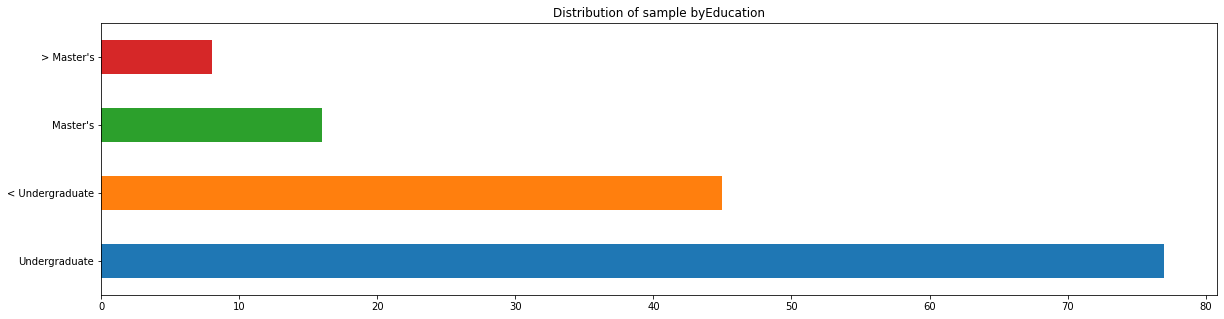

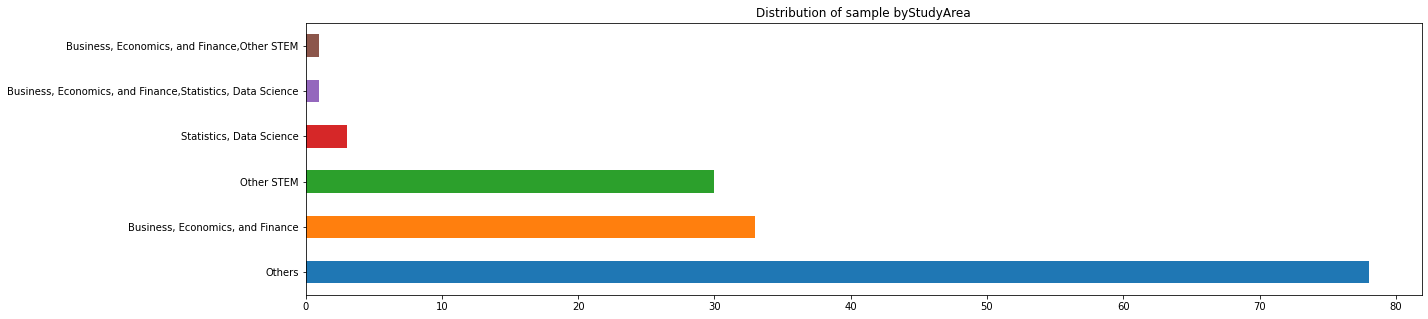

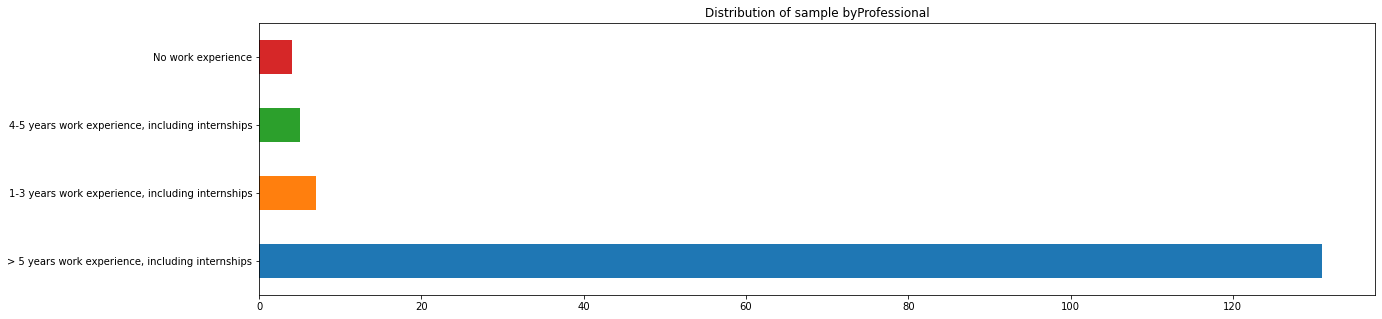

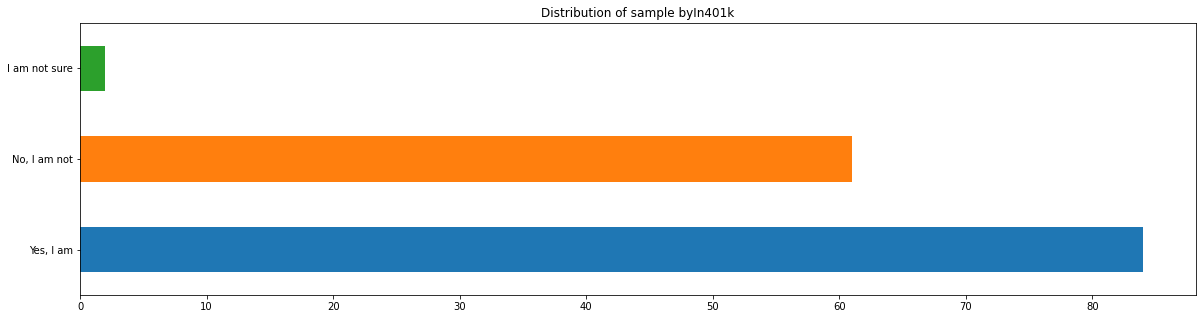

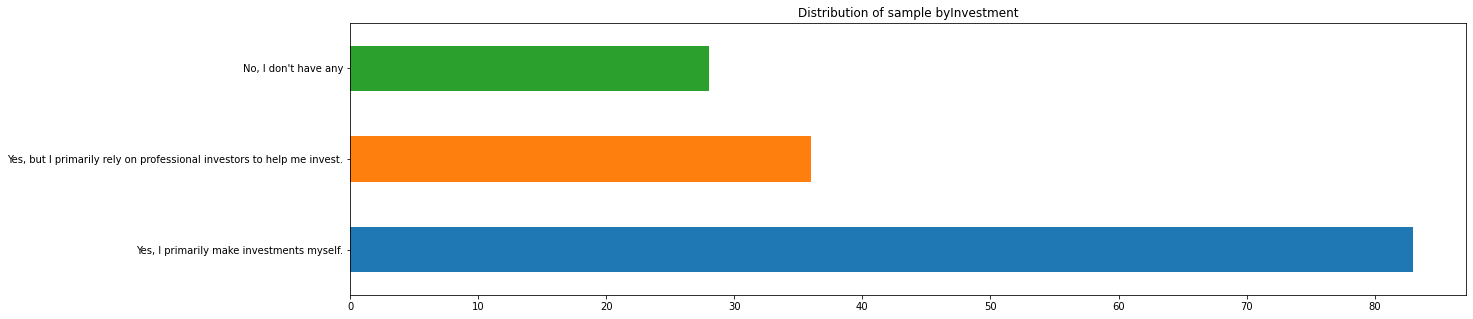

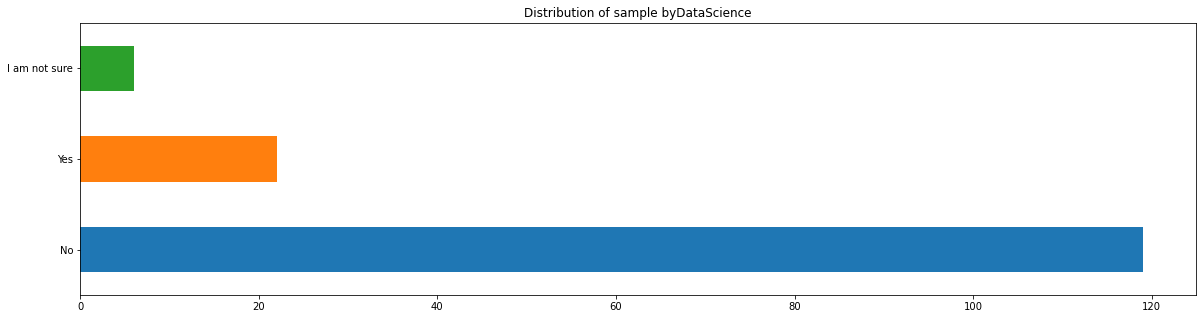

In [4]:
for i in ['Education', 'StudyArea', 'Professional',
         'In401k', 'Investment', 'DataScience']:
    df[str(i)].value_counts().plot(kind='barh', figsize=(20,5), color=colors)
    plt.title('Distribution of sample by' + str(i))
    plt.show()
    plt.close()

In [5]:
cov = ['Education', 'Professional','In401k', 'Investment', 'DataScience']

In [6]:
print(df.groupby('Group')[cov[0]].value_counts())
df['education_score'] = 0
df.loc[df['Education']=='Undergraduate','education_score'] = 0
df.loc[df['Education']=="Master's",'education_score'] = 1
df.loc[df['Education']=="> Master's",'education_score'] = 1
X1 = df[df['Group']=='Treatment']['education_score']
X0 = df[df['Group']=='Control']['education_score']
print("Difference in education score:", X1.mean() - X0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(X0), np.var(X1)))
print("The t-test of the mean education difference has a p-value of {}.".format(stats.ttest_ind(X1, X0, equal_var=True)[1]))

Group      Education      
Control    Undergraduate      37
           < Undergraduate    29
           Master's            7
           > Master's          1
Treatment  Undergraduate      40
           < Undergraduate    16
           Master's            9
           > Master's          7
Name: Education, dtype: int64
Difference in education score: 0.11555555555555554
The variances are 0.09528888888888885 and 0.17283950617283966 for the control and treatment groups, respectively.
The t-test of the mean education difference has a p-value of 0.058709107659612805.


In [7]:
print(df.groupby('Group')[cov[1]].value_counts())
df['experience_score'] = 0
df.loc[df['Professional']=='1-3 years work experience, including internships','experience_score'] = 1
df.loc[df['Professional']=="4-5 years work experience, including internships",'experience_score'] = 2
df.loc[df['Professional']=="> 5 years work experience, including internships",'experience_score'] = 3
X1 = df[df['Group']=='Treatment']['experience_score']
X0 = df[df['Group']=='Control']['experience_score']
print("Difference in experience score:", X1.mean() - X0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(X0), np.var(X1)))
print("The t-test of the mean experience score difference has a p-value of {}.".format(stats.ttest_ind(X1, X0, equal_var=True)[1]))

Group      Professional                                    
Control    > 5 years work experience, including internships    67
           No work experience                                   4
           1-3 years work experience, including internships     3
           4-5 years work experience, including internships     1
Treatment  > 5 years work experience, including internships    64
           1-3 years work experience, including internships     4
           4-5 years work experience, including internships     4
Name: Professional, dtype: int64
Difference in experience score: 0.08666666666666689
The variances are 0.5891555555555563 and 0.2500000000000001 for the control and treatment groups, respectively.
The t-test of the mean experience score difference has a p-value of 0.4238107594329512.


In [8]:
print(df.groupby('Group')[cov[2]].value_counts())
df['e401k_status'] = 0
df.loc[df['In401k']=="Yes, I am", 'e401k_status'] = 1
X1 = df[df['Group']=='Treatment']['e401k_status']
X0 = df[df['Group']=='Control']['e401k_status']
print("Difference in e401k status:", X1.mean() - X0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(X0), np.var(X1)))
print("The t-test of the mean 401k status difference has a p-value of {}.".format(stats.ttest_ind(X1, X0, equal_var=True)[1]))

Group      In401k       
Control    Yes, I am        39
           No, I am not     36
Treatment  Yes, I am        45
           No, I am not     25
           I am not sure     2
Name: In401k, dtype: int64
Difference in e401k status: 0.10499999999999998
The variances are 0.2496 and 0.234375 for the control and treatment groups, respectively.
The t-test of the mean 401k status difference has a p-value of 0.20103306368696297.


In [9]:
print(df.groupby('Group')[cov[3]].value_counts())
df['investment_background'] = 0
df.loc[df['Investment']=="Yes, but I primarily rely on professional investors to help me invest.", 'investment_background'] = 0.5
df.loc[df['Investment']=="Yes, I primarily make investments myself.", 'investment_background'] = 1
X1 = df[df['Group']=='Treatment']['investment_background']
X0 = df[df['Group']=='Control']['investment_background']
print("Difference in investment background:", X1.mean() - X0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(X0), np.var(X1)))
print("The t-test of the mean difference in investment background has a p-value of {}.".format(stats.ttest_ind(X1, X0, equal_var=True)[1]))

Group      Investment                                                            
Control    Yes, I primarily make investments myself.                                 39
           No, I don't have any                                                      19
           Yes, but I primarily rely on professional investors to help me invest.    17
Treatment  Yes, I primarily make investments myself.                                 44
           Yes, but I primarily rely on professional investors to help me invest.    19
           No, I don't have any                                                       9
Name: Investment, dtype: int64
Difference in investment background: 0.10972222222222228
The variances are 0.17555555555555546 and 0.12495177469135793 for the control and treatment groups, respectively.
The t-test of the mean difference in investment background has a p-value of 0.09108924246338256.


In [10]:
print(df.groupby('Group')[cov[4]].value_counts())
df['data_science_background'] = 0
df.loc[df['DataScience']=="Yes", 'data_science_background'] = 1
X1 = df[df['Group']=='Treatment']['data_science_background']
X0 = df[df['Group']=='Control']['data_science_background']
print("Difference in Data science background:", X1.mean() - X0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(X0), np.var(X1)))
print("The t-test of the mean difference in Data science background has a p-value of {}.".format(stats.ttest_ind(X1, X0, equal_var=True)[1]))

Group      DataScience  
Control    No               62
           Yes              10
           I am not sure     3
Treatment  No               57
           Yes              12
           I am not sure     3
Name: DataScience, dtype: int64
Difference in Data science background: 0.033333333333333326
The variances are 0.11555555555555558 and 0.13888888888888895 for the control and treatment groups, respectively.
The t-test of the mean difference in Data science background has a p-value of 0.5742522857891523.


## Outcome = Correct answer 8000-9000 USD (1 Correct, 0 Incorrect)


Control group answers:
Almost $6000    41
$19,559         20
$8000-$9000     14
Name: Control, dtype: int64

Treatment group answers:
Almost $6000    32
$8000-$9000     25
$19,559         15
Name: Treatment, dtype: int64
--------------------------------------------------
Distribution of outcome by group
--------------------------------------------------


<AxesSubplot:ylabel='Outcome'>

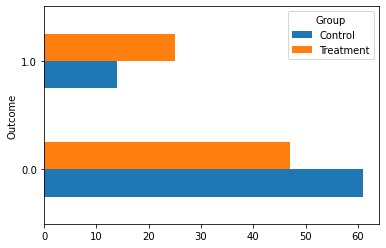

In [11]:
df['Outcome'] = None
df.loc[(df['Control']=='$8000-$9000') | (df['Treatment']=='$8000-$9000'), 'Outcome'] = 1
df.loc[(df['Control']=='Almost $6000') | (df['Treatment']=='Almost $6000'), 'Outcome'] = 0
df.loc[df['Outcome'].isnull(), 'Outcome'] = 0
df['Outcome'] = df['Outcome'].astype(float)

print('\nControl group answers:')
print(df['Control'].value_counts())
print('\nTreatment group answers:')
print(df['Treatment'].value_counts())

print("-" * 50)
print("Distribution of outcome by group")
print("-" * 50)
df.groupby('Group')['Outcome'].value_counts().unstack(0).plot.barh(color=colors)

In [12]:
print("-" * 50)
print("Mean outcoem by group")
print("-" * 50)
print(df.groupby('Group')['Outcome'].mean())

--------------------------------------------------
Mean outcoem by group
--------------------------------------------------
Group
Control     0.1867
Treatment   0.3472
Name: Outcome, dtype: float64


In [13]:
Y1 = df[df['Group']=='Treatment']['Outcome']
Y0 = df[df['Group']=='Control']['Outcome']
print("ATE:", Y1.mean() - Y0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

ATE: 0.16055555555555553
The variances are 0.151822222222222 and 0.22665895061728392 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.027544900175178758.


## Outcome = Efficiency (time taken to complete the survey in secs)

In [14]:
df.groupby('Group')['Time'].mean()

Group
Control     108.6267
Treatment   108.3194
Name: Time, dtype: float64

--------------------------------------------------
Histogram of Time (seconds)
--------------------------------------------------


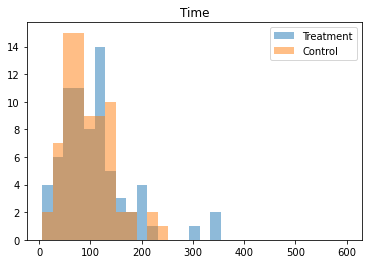

In [15]:
print("-" * 50)
print("Histogram of Time (seconds)")
print("-" * 50)
bins = np.linspace(df['Time'].min(), 600, 30)
pyplot.hist(df[df['Group']=='Treatment']['Time'], bins, alpha=0.5, label='Treatment')
pyplot.hist(df[df['Group']=='Control']['Time'], bins, alpha=0.5, label='Control')
pyplot.legend(loc='upper right')
pyplot.title('Time')
pyplot.show()
pyplot.close()

In [16]:
Y1 = df[df['Group']=='Treatment']['Time']
Y0 = df[df['Group']=='Control']['Time']

print("ATE:", Y1.mean() - Y0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
print("The t-test of the mean time difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

ATE: -0.3072222222222223
The variances are 16839.43395555556 and 4579.161844135802 for the control and treatment groups, respectively.
The t-test of the mean time difference has a p-value of 0.9858491683781828.


## Outcome = Checking references for help to complete the survey

In [17]:
df.groupby(['Group'])['CheckReference'].value_counts()

Group      CheckReference
Control    No                57
           Yes               18
Treatment  No                46
           Yes               26
Name: CheckReference, dtype: int64

--------------------------------------------------
Distribution of Reading without reference by group
--------------------------------------------------


<AxesSubplot:ylabel='Reading without reference'>

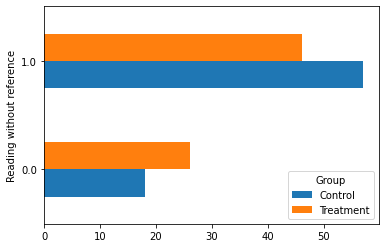

In [18]:
df['Reading without reference'] = None
df.loc[(df['CheckReference']=='No'), 'Reading without reference'] = 1
df.loc[df['Reading without reference'].isnull(), 'Reading without reference'] = 0
df['Reading without reference'] = df['Reading without reference'].astype(float)

print("-" * 50)
print("Distribution of Reading without reference by group")
print("-" * 50)
df.groupby('Group')['Reading without reference'].value_counts().unstack(0).plot.barh(color=colors)

In [19]:
Y1 = df[df['Group']=='Treatment']['Reading without reference']
Y0 = df[df['Group']=='Control']['Reading without reference']

print("ATE:", Y1.mean() - Y0.mean())
print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
print("The t-test of the mean difference in Reading without reference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

ATE: -0.12111111111111117
The variances are 0.1824000000000003 and 0.23070987654321 for the control and treatment groups, respectively.
The t-test of the mean difference in Reading without reference has a p-value of 0.11044704614405117.


# Block by professional and educational background

### Education

In [20]:
df.loc[df['education_score']>0,'education_score']=1
print(df['education_score'].value_counts())

for i in df['education_score'].unique():

    print("\neducation score:", str(i))
    Y1 = df[(df['Group']=='Treatment') & (df['education_score']==i)]['Outcome']
    Y0 = df[(df['Group']=='Control') & (df['education_score']==i)]['Outcome']

    print("ATE:", Y1.mean() - Y0.mean())
    print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
    print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

0    123
1     24
Name: education_score, dtype: int64

education score: 0
ATE: 0.14525586353944564
The variances are 0.15638226776564942 and 0.22417091836734704 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.06838872484418841.

education score: 1
ATE: 0.25
The variances are 0.109375 and 0.234375 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.22115490964710086.


### Work experience

In [21]:
df['experience_score'] = 0
df.loc[df['Professional']=='1-3 years work experience, including internships','experience_score'] = 0
df.loc[df['Professional']=="4-5 years work experience, including internships",'experience_score'] = 0
df.loc[df['Professional']=="> 5 years work experience, including internships",'experience_score'] = 1

print(df['experience_score'].value_counts())

for i in df['experience_score'].unique():

    print("\nWork experience score:", str(i))
    Y1 = df[(df['Group']=='Treatment') & (df['experience_score']==i)]['Outcome']
    Y0 = df[(df['Group']=='Control') & (df['experience_score']==i)]['Outcome']

    print("ATE:", Y1.mean() - Y0.mean())
    print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
    print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

1    131
0     16
Name: experience_score, dtype: int64

Work experience score: 1
ATE: 0.19519589552238806
The variances are 0.1372243261305412 and 0.230224609375 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.010613096924951873.

Work experience score: 0
ATE: -0.125
The variances are 0.234375 and 0.1875 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.6185599512335765.


### Investment background

In [22]:
df['investment_background'] = 0
df.loc[df['Investment']=="Yes, but I primarily rely on professional investors to help me invest.", 'investment_background'] = 0
df.loc[df['Investment']=="Yes, I primarily make investments myself.", 'investment_background'] = 1

print(df['investment_background'].value_counts())

for i in df['investment_background'].unique():

    print("\ninvestment background:", str(i))
    Y1 = df[(df['Group']=='Treatment') & (df['investment_background']==i)]['Outcome']
    Y0 = df[(df['Group']=='Control') & (df['investment_background']==i)]['Outcome']

    print("ATE:", Y1.mean() - Y0.mean())
    print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
    print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

1    83
0    64
Name: investment_background, dtype: int64

investment background: 1
ATE: 0.2097902097902098
The variances are 0.13017751479289943 and 0.23140495867768582 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.030818486949751207.

investment background: 0
ATE: 0.09920634920634924
The variances are 0.17283950617283966 and 0.21811224489795905 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.38070771208171583.


### Are you enrolled in 401k? (Yes, No)

In [23]:
df.loc[df['In401k']=='I am not sure', 'In401k'] = 'No, I am not'
print(df['In401k'].value_counts())

for i in df['In401k'].unique():

    print("\nEnrolled in 401k:", str(i))
    Y1 = df[(df['Group']=='Treatment') & (df['In401k']==str(i))]['Outcome']
    Y0 = df[(df['Group']=='Control') & (df['In401k']==str(i))]['Outcome']

    print("ATE:", Y1.mean() - Y0.mean())
    print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
    print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

Yes, I am       84
No, I am not    63
Name: In401k, dtype: int64

Enrolled in 401k: No, I am not
ATE: 0.12962962962962962
The variances are 0.13888888888888887 and 0.20850480109739364 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.22725246004317023.

Enrolled in 401k: Yes, I am
ATE: 0.17264957264957265
The variances are 0.1630506245890861 and 0.23506172839506173 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.08624412598748671.


### Do you have formal training in data science? (Yes, No)

In [24]:
df.loc[df['DataScience']=='I am not sure', 'DataScience'] = 'No'
print(df['DataScience'].value_counts())

for i in df['DataScience'].unique():

    print("\nData science:", str(i))
    Y1 = df[(df['Group']=='Treatment') & (df['DataScience']==str(i))]['Outcome']
    Y0 = df[(df['Group']=='Control') & (df['DataScience']==str(i))]['Outcome']

    print("ATE:", Y1.mean() - Y0.mean())
    print("The variances are {} and {} for the control and treatment groups, respectively.".format(np.var(Y0), np.var(Y1)))
    print("The t-test of the mean outcome difference has a p-value of {}.".format(stats.ttest_ind(Y1, Y0, equal_var=True)[1]))

No     125
Yes     22
Name: DataScience, dtype: int64

Data science: No
ATE: 0.1474358974358974
The variances are 0.14059171597633133 and 0.216388888888889 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.05443764110466267.

Data science: Yes
ATE: 0.2
The variances are 0.21000000000000002 and 0.25 for the control and treatment groups, respectively.
The t-test of the mean outcome difference has a p-value of 0.3659958339806202.


## Regression analysis

In [25]:
import statsmodels.formula.api as smf

formula  = "Outcome ~ 1 + C(Group) + education_score + experience_score + e401k_status + investment_background + data_science_background"
mod = smf.logit(formula=formula, data=df)
res = mod.fit(cov_type='HC3')
res.summary()

Optimization terminated successfully.
         Current function value: 0.553091
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  147
Model:                          Logit   Df Residuals:                      140
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.04398
Time:                        00:02:56   Log-Likelihood:                -81.304
converged:                       True   LL-Null:                       -85.045
Covariance Type:                  HC3   LLR p-value:                    0.2787
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.6847      0.760     -2.215      0.027      -3.175      -0.194
C(Group)[T.Treatment]       0.8175      0.392      2.083      0.037       0.048       1.587
education_score            -0.0856      0.525     -0.163      0.871      -1.114       0.943
experience_score           -0.0038      0.655     -0.006      0.995      -1.287       1.279
e401k_status                0.2022      0.405      0.499      0.617      -0.591       0.996
investment_background       0.0042      0.387      0.011      0.991      -0.754       0.762
data_science_background     0.7077      0.528      1.341      0.180      -0.326       1.742
===========================================================================================
"""